In [164]:
# import autograd functionally
import autograd.numpy as np
from autograd.misc.flatten import flatten_func
from autograd import grad as compute_grad

# import various other libraries
import copy
import matplotlib.pyplot as plt

# this is needed to compensate for %matplotl+ib notebook's tendancy lotted inline
from matplotlib import rcParams
rcParams["figure.autolayout"] = True

In [165]:
# gradient descent function
def gradient_descent(g, w ,alpha, max_its, beta):
    # flatten the input function, create gradient based on flat function
    g_flat, unflatten, w = flatten_func(g, w)
    grad = compute_grad(g_flat)

    # record history
    w_hist = []
    # push the first w
    w_hist.append(unflatten(w))

    # start gradient descent loop
    z = np.zeros(np.shape(w))  # momentum term

    # over the line
    for k in range(max_its):
        # plug in value into func and derivative
        grad_eval = grad(w)
        grad_eval.shape = np.shape(w)

        # take descent step with momentum
        z = beta * z + grad_eval
        w = w -alpha * z

        # record weight update
        w_hist.append(unflatten(w))

    return w_hist

def model(x ,w):
    # feature transformations
    f = w[0] + np.dot(x, w[1:])
    return f

def plotting(cost_hist, ylabelName, label):
    figure, axes = plt.subplots(1,1, figsize = (6,5))
    axes.plot(range(len(cost_hist)),cost_hist, label = label, linestyle = "solid")
    axes.set_xlabel("iterations")
    axes.set_ylabel(ylabelName)
    axes.legend()
    plt.show()

In [166]:
csvname = "breast_cancer_data.csv"
data = np.loadtxt(csvname, delimiter = ',')
data = data.T
x = data[:,:-1]
y = data[:,-1:]

In [167]:
def sign(x):
    a_1 = np.array(x>=0, dtype = np.int)
    a_2 = np.array(x<0, dtype = np.int)
    return a_1*1 + a_2*(-1)

def softmax_cost(w):
    cost = np.sum(np.log(1+np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

def perceptron_cost(w):
    cost = np.sum(np.maximum(0,-y*model(x,w)))
    return cost/float(np.size(y))

In [168]:
# initialize parameters
alpha = 0.06
max_its = 1000
beta = 0
w_init = np.random.randn(x.shape[1]+1, 1)

In [169]:
# run gradient descent, create cost function history
weight_history = gradient_descent(softmax_cost, w_init, alpha, max_its,beta)
# use MSE to validate the regression quality
cost_history = [softmax_cost(v) for v in weight_history]

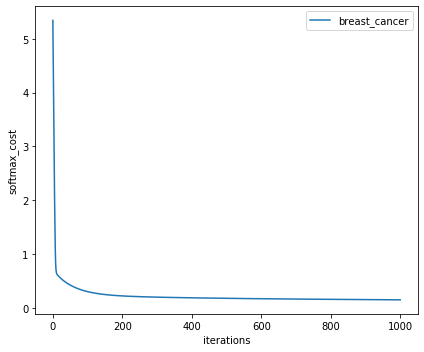

In [170]:
plotting(cost_history, "softmax_cost", "breast_cancer")

In [171]:
best_w = weight_history[-1]

In [175]:
def correct_classification(x,y):
    result = np.array(x == y, dtype = int)
    number = np.sum(result)
    return number

In [176]:
correct_classification(sign(model(x,best_w)),y)

674

When we use the softmax cost, the misclassification number is : 699-674 = 25

In [177]:
# run gradient descent, create cost function history
weight_history = gradient_descent(perceptron_cost, w_init, alpha, max_its,beta)
# use MSE to validate the regression quality
cost_history = [perceptron_cost(v) for v in weight_history]

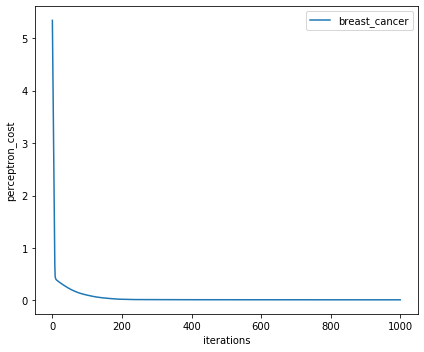

In [178]:
plotting(cost_history, "perceptron_cost", "breast_cancer")

In [179]:
best_w = weight_history[-1]

In [180]:
correct_classification(sign(model(x,best_w)),y)

671

So the misclassification number is : 699-671 = 28

In this problem, we measure two methods-softmax and perceptron.
In the softmax cost, the misclassification number is 25;
In the perceptron cost, the misclassification number is 28;
Those two may be a little larger than 20, but close to it.